### K-Means clustering ไฟล์ที่กำหนดให้ชือ loyalty.csv ให้วิเคราะห์ข้อมูลโดยใช้ K-Means 
1. Plotting the data ดูการกระจายข้อมูล ให้นศ.พิจารณาว่า ข้อมูลใดควรเป็นแกน x และy
2. ทำ K-Means clustering ใช้ k=3
3. plot การจัดกลุ่ม
3. พิจารณาว่าค่าแบ่งข้อมูลเป็น 3 กลุ่ม เหมาะสมหรือไม่
4. แสดงจำนวนกลุ่มที่ดีที่สุดของข้อมูลชุดนี้

In [3]:
import numpy as np
import pandas as pd


from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns


In [4]:
data = pd.read_csv('loyalty.csv')
data

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06
5,1,-1.66
6,10,-0.97
7,8,-0.32
8,8,1.02
9,8,0.68


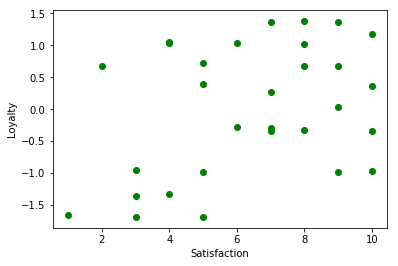

In [5]:
plt.scatter(data['Satisfaction'], data['Loyalty'],  c='green', marker="o") 
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show()

In [6]:
k_means = KMeans(n_clusters=3)
k_means.fit(data)
cluster_pred = k_means.fit_predict(data)

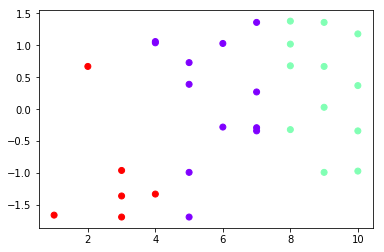

In [7]:
plt.scatter(data['Satisfaction'], data['Loyalty'], c=cluster_pred, cmap='rainbow', marker="o")

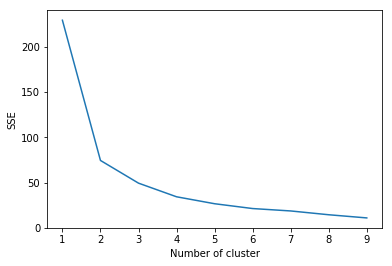

In [8]:
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k).fit(data)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

1 59.99999999999999
2 29.818973034723147
3 17.913349527387965
4 10.247181805928424
5 7.792695153937187
6 6.54983679159933
7 5.34807941029098
8 4.387789628893001
9 3.6879759638524665


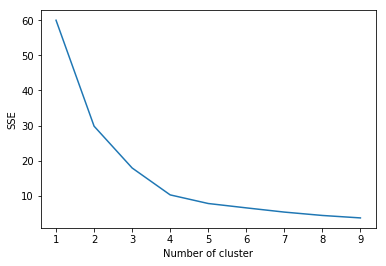

In [10]:
from sklearn import preprocessing
data_scale = preprocessing.scale(data) #re scal เพื่อหาความชัดว่ามีกี่กลุ่ม


sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k).fit(data_scale)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    print(k,sse[k])
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

[[ 2.66666667 -1.055     ]
 [ 9.5         0.16375   ]
 [ 5.          0.16125   ]
 [ 7.5         0.47      ]]


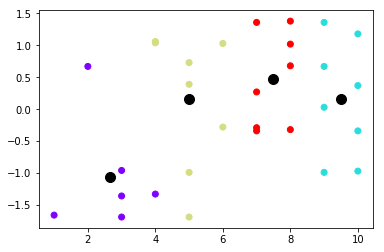

In [13]:
k_means = KMeans(n_clusters=4)
k_means.fit(data)
cluster_scale_pred = k_means.fit_predict(data)



plt.scatter(data['Satisfaction'], data['Loyalty'], c=cluster_scale_pred, cmap='rainbow', marker="o")

centers = k_means.cluster_centers_
print(centers) #พิมพ์จุดกลาง
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100)